# Hierarchical Clustering
## 1. Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 2. Import Data

In [94]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
df = pd.read_csv(path)
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


## 3. Pre-processing Data

In [95]:
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

Removing rows with null values

In [96]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
        'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
        'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
        'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
        'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


Feature Selection

In [97]:
featureset = df.iloc[:,-9:-1]
featureset

,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
2,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
3,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
4,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933
...,...,...,...,...,...,...,...,...
112,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278
113,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427
114,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934
115,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259


Normalization

In [98]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.21518987, 0.18655098, 0.28143713, 0.30625832, 0.2310559 ,
        0.13364055, 0.43333333, 0.59235294],
       [0.43037975, 0.3362256 , 0.46107784, 0.5792277 , 0.50372671,
        0.31797235, 0.33333333, 0.69176471],
       [0.39240506, 0.47722343, 0.52694611, 0.62849534, 0.60714286,
        0.35483871, 0.23333333, 0.51258824],
       [0.24050633, 0.21691974, 0.33532934, 0.38082557, 0.34254658,
        0.28110599, 0.4       , 0.61435294],
       [0.36708861, 0.34924078, 0.80838323, 0.56724368, 0.5173913 ,
        0.37788018, 0.23333333, 0.60470588]])

## 4. Clustering (Scipy)

Distance Matrix

In [99]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

<ipython-input-99-2630f2af58dc>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.55109212, 0.71884594, ..., 0.31357356, 0.25642092,
        0.22750758],
       [0.55109212, 0.        , 0.28678673, ..., 0.30195275, 0.66217347,
        0.64046541],
       [0.71884594, 0.28678673, 0.        , ..., 0.50264043, 0.78939382,
        0.750951  ],
       ...,
       [0.31357356, 0.30195275, 0.50264043, ..., 0.        , 0.46121852,
        0.44102317],
       [0.25642092, 0.66217347, 0.78939382, ..., 0.46121852, 0.        ,
        0.16471904],
       [0.22750758, 0.64046541, 0.750951  , ..., 0.44102317, 0.16471904,
        0.        ]])

In [100]:
import pylab
import scipy.cluster.hierarchy
Z = scipy.cluster.hierarchy.linkage(D, 'complete')

<ipython-input-100-e89f68dff182>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = scipy.cluster.hierarchy.linkage(D, 'complete')


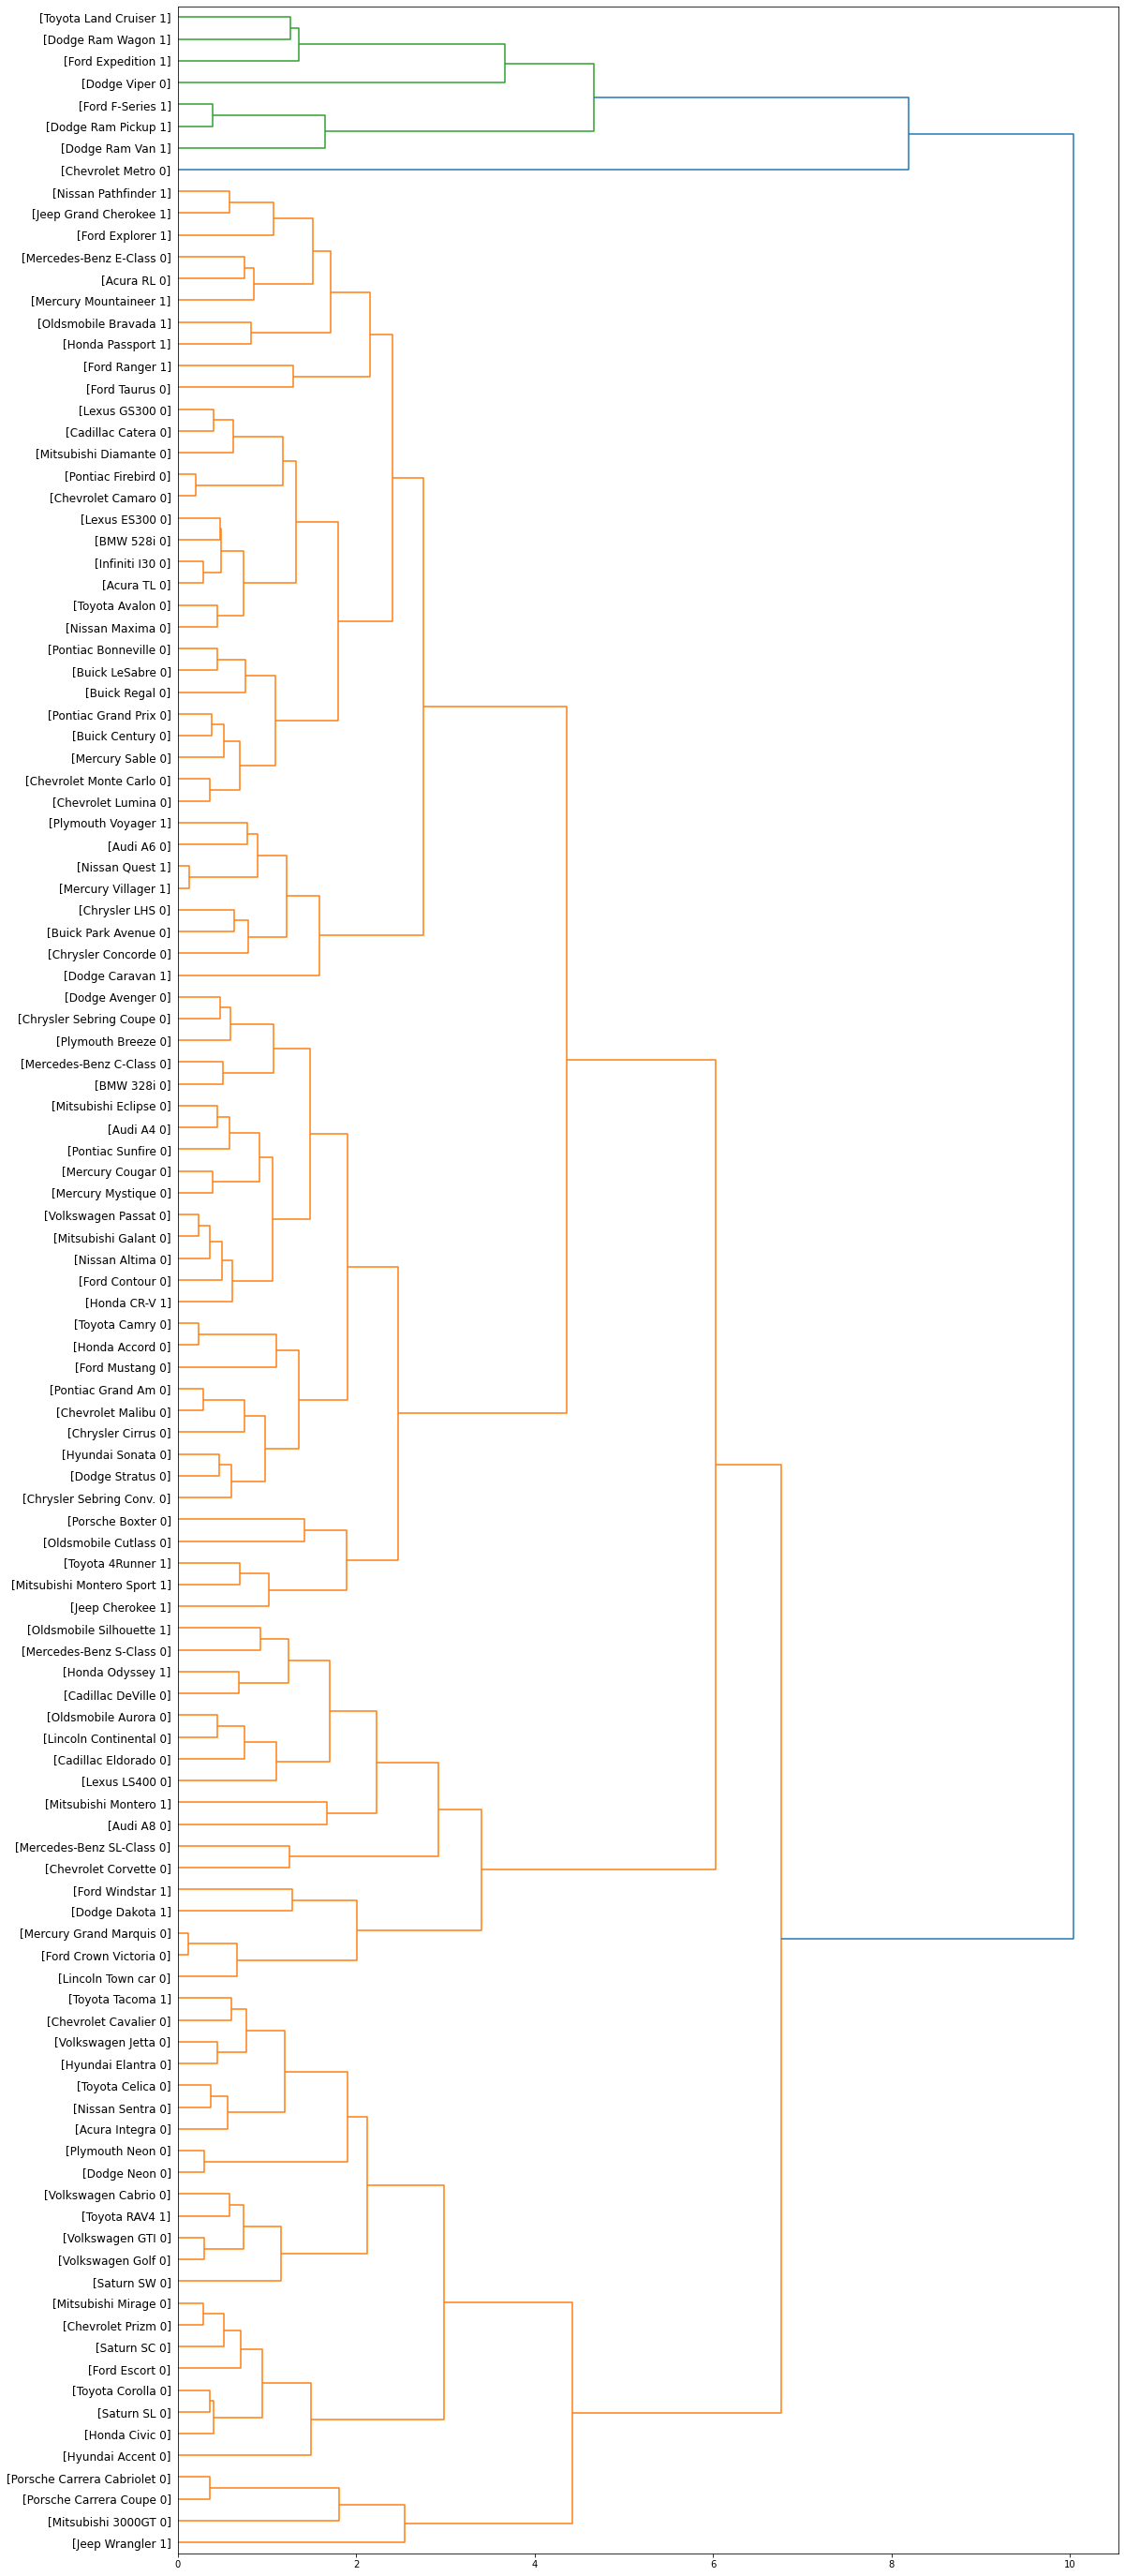

In [101]:
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

fig = pylab.figure(figsize=(18,50))
dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [102]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 2,  6,  6,  5,  6,  4,  5,  6,  6,  6,  6,  6,  4,  4,  6,  2,  5,
        6,  6,  6,  4,  2, 10,  5,  5,  6,  5,  6,  2,  5,  5,  9,  7,  8,
        7,  3,  6,  2,  5,  5,  6,  3,  6,  3,  8,  6,  7,  2,  5,  5,  6,
        4,  2,  2,  5,  6,  1,  5,  6,  6,  6,  4,  4,  3,  2,  5,  5,  6,
        1,  4,  5,  5,  5,  6,  3,  6,  6,  5,  6,  4,  4,  2,  5,  6,  6,
        6,  5,  4,  6,  4,  2,  5,  6,  5,  5,  6,  6,  6,  5,  1,  1,  2,
        2,  2,  2,  5,  6,  2,  2,  2,  5,  8,  2,  2,  5,  2,  2],
      dtype=int32)

In [104]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

## 5. CLustering (Scikit-Learn)

DIstance Matrix

In [110]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.55109212 0.71884594 ... 0.31357356 0.25642092 0.22750758]
 [0.55109212 0.         0.28678673 ... 0.30195275 0.66217347 0.64046541]
 [0.71884594 0.28678673 0.         ... 0.50264043 0.78939382 0.750951  ]
 ...
 [0.31357356 0.30195275 0.50264043 ... 0.         0.46121852 0.44102317]
 [0.25642092 0.66217347 0.78939382 ... 0.46121852 0.         0.16471904]
 [0.22750758 0.64046541 0.750951   ... 0.44102317 0.16471904 0.        ]]


In [111]:
Z_using_dist_matrix = scipy.cluster.hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-111-a6378caa04e4>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = scipy.cluster.hierarchy.linkage(dist_matrix, 'complete')


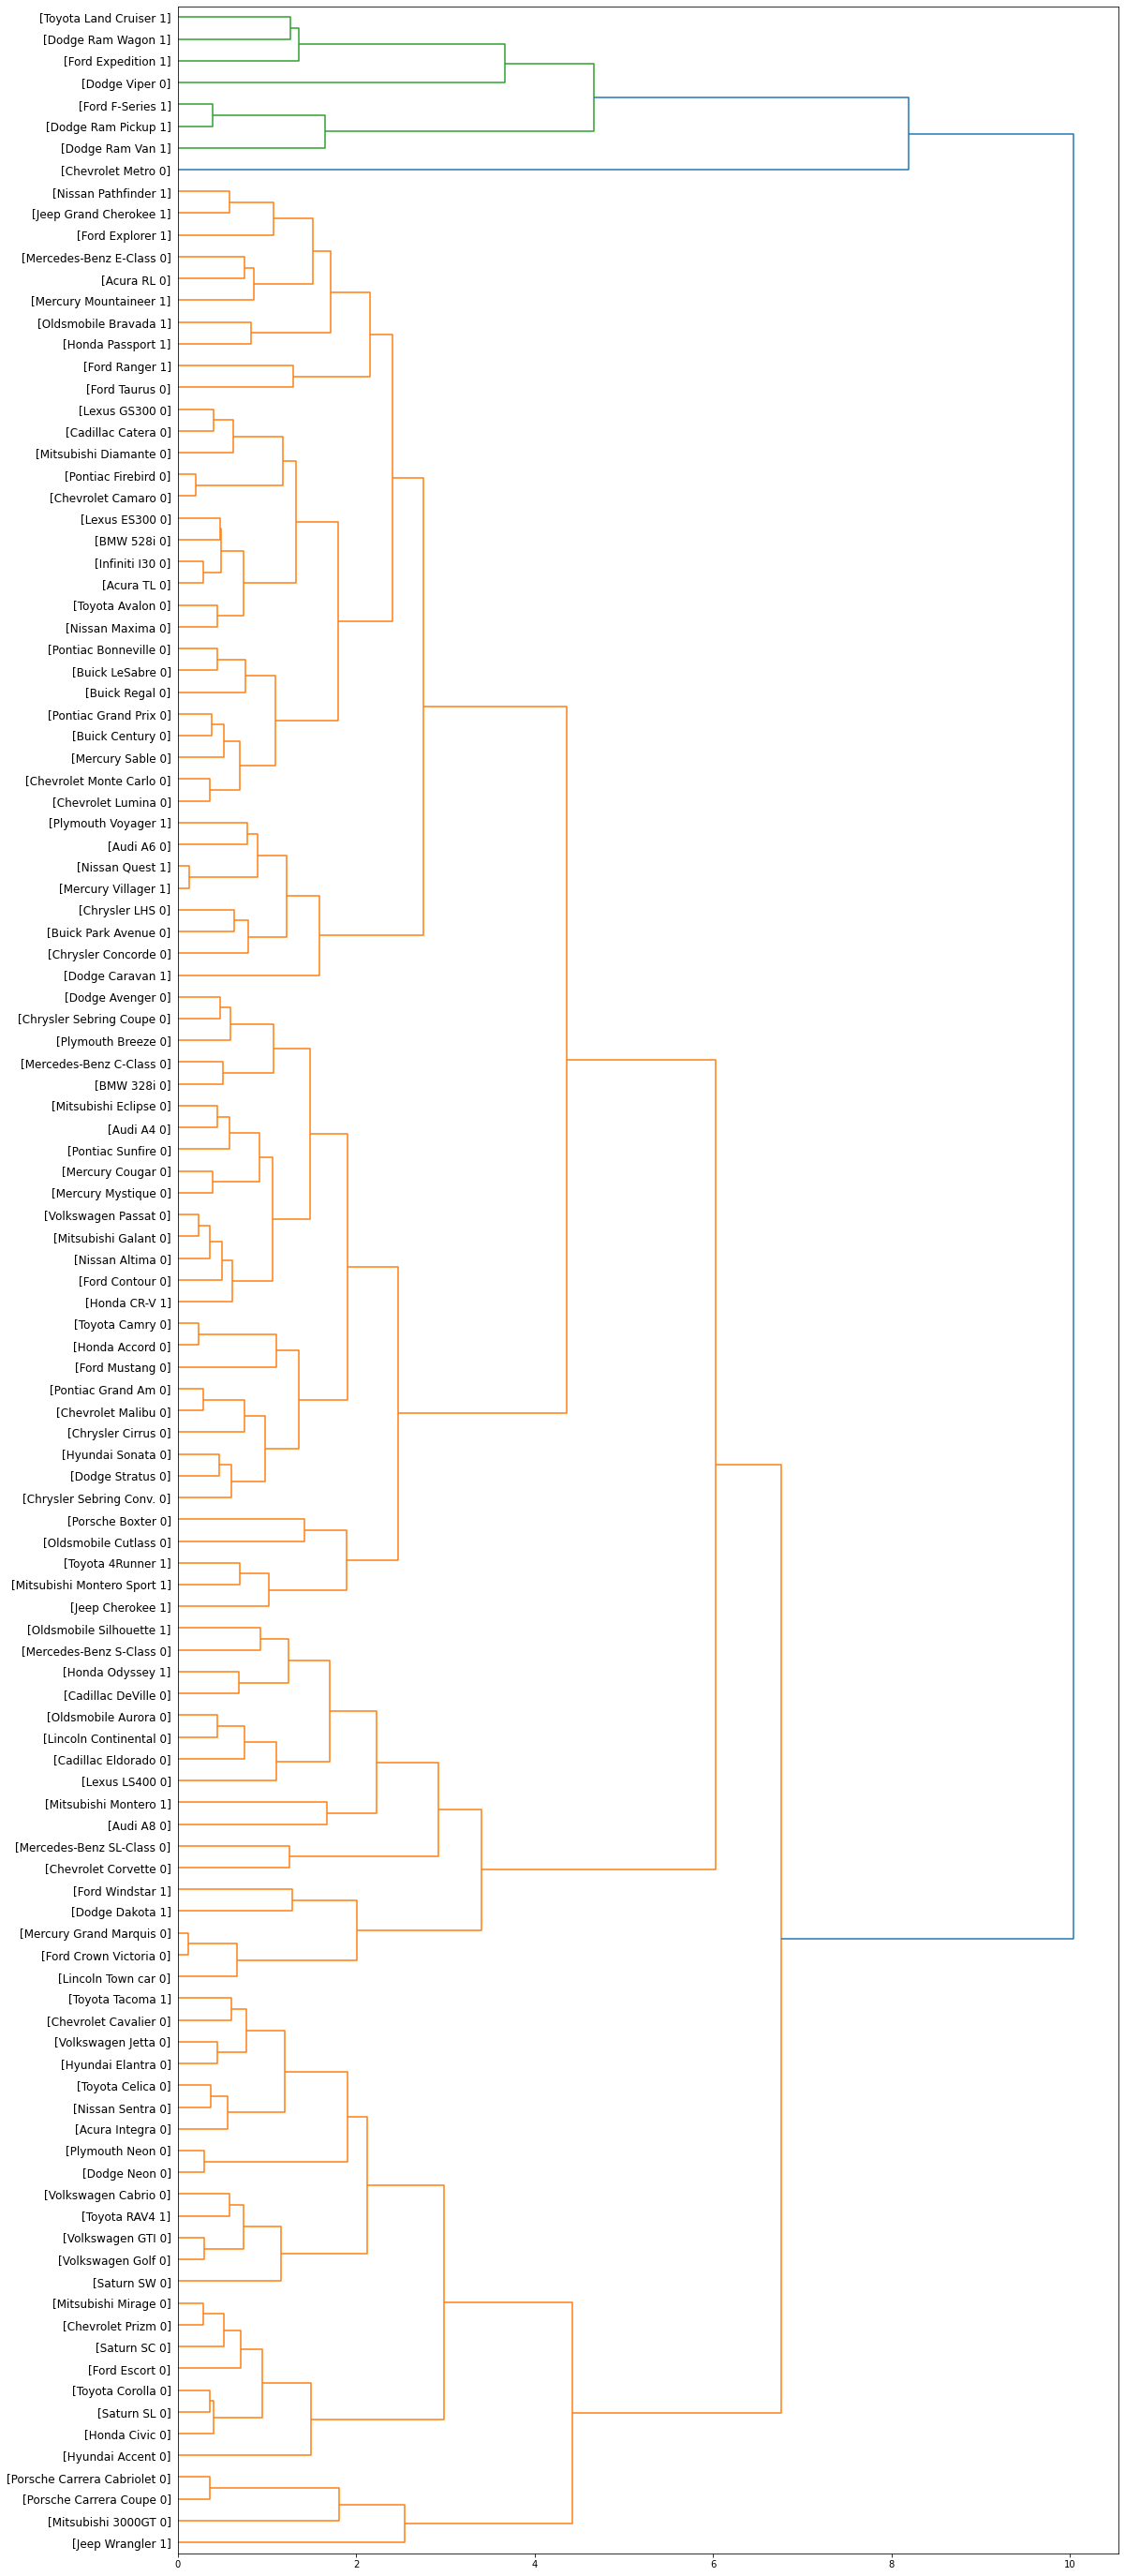

In [113]:
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

fig = pylab.figure(figsize=(18,50))
dendro = scipy.cluster.hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [114]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\users\mackt\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 0, 1, 1, 1, 1, 4, 0,
       5, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 3, 2, 4, 1, 0, 1, 1, 1, 4, 1, 4,
       3, 1, 2, 0, 1, 1, 1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 4, 4, 4, 0, 1,
       1, 1, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 4,
       1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 3, 0, 0, 1, 0, 0], dtype=int64)

Add Cluster ID for each row

In [115]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1


Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

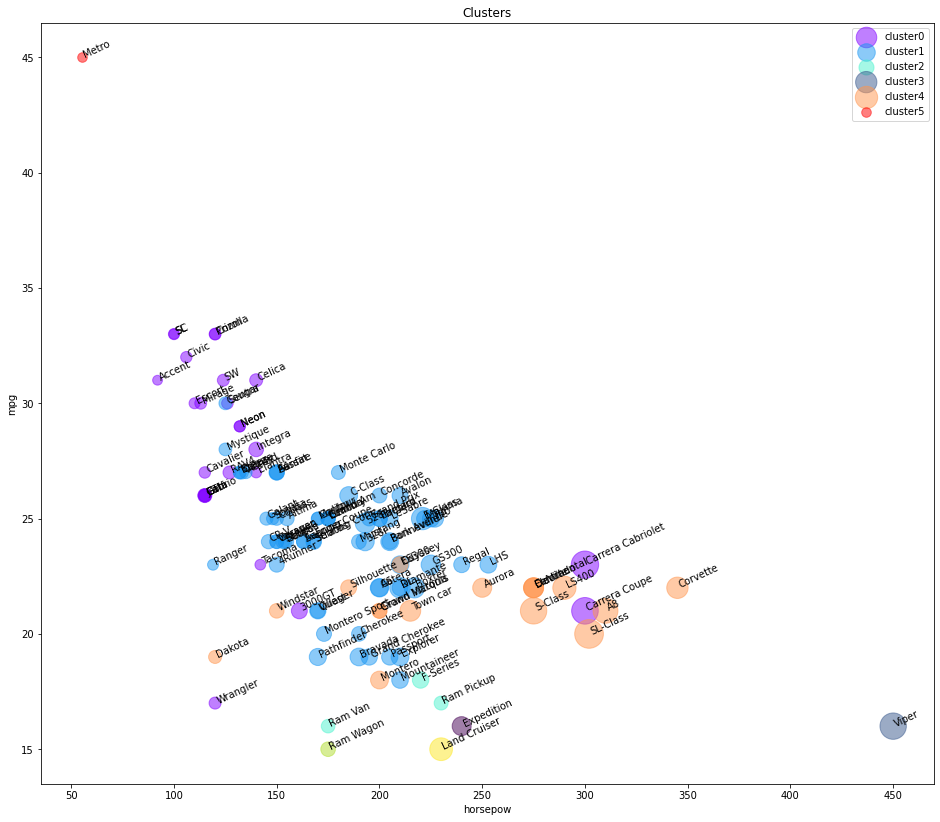

In [117]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Cars    (type=0)

Trucks  (type=1)

In [118]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     23
          1.0      3
1         0.0     51
          1.0     15
2         1.0      3
3         0.0      1
          1.0      3
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [120]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-120-a9701cdb999c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   136.130435  2.069565  28.521739  19.824435
         1.0   129.666667  2.300000  22.333333  14.292000
1        0.0   181.176471  2.886275  24.858824  24.464549
         1.0   173.200000  3.226667  20.866667  24.016067
2        1.0   208.333333  4.566667  17.000000  21.656667
3        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   215.000000  4.400000  15.333333  36.392667
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

Only 3 main clusters:
- Cluster 0 (23 Cars | 3 Trucks)
- Cluster 1 (51 Cars | 15 Trucks)
- Cluster 4 (12 Cars | 5 Trucks)

| Cluster | horsepower | mpg | Price |
| --- | --- | --- | --- |
| Cluster 0 | High | Low | High |
| Cluster 1 | Low | High | Low |
| Cluster 4 | Med | Med | Med |

Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

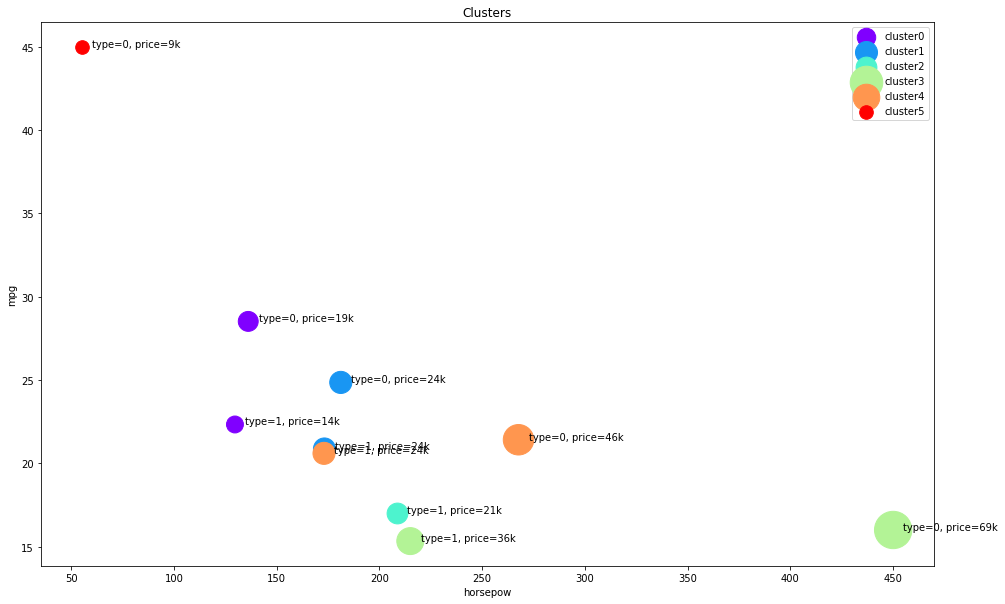

In [121]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')